# Data Mining (KEN4113) #
## Lab 4: Clustering ##

Konstantin Sandfort
i6255681

In [55]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

## Assignment 1

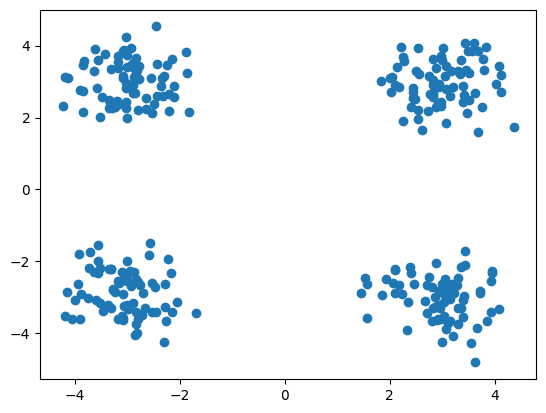

In [56]:
# (a) Data Generation

centers = [[-3, -3], [3, -3], [-3, 3], [3, 3]]
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.6, random_state=None)
plt.scatter(X[:, 0], X[:, 1])

In [57]:
def exec_KMeans(data_X, data_y, random_state_):
    """
    This method runs the whole procedure of KMeans clustering including visualisation of the clusters, displaying the contingency matrices and plotting the SSE error for different values of k.
    :param data_X:
    :param data_y:
    :param random_state_:
    :return:
    """
    fig, axs = plt.subplots(2, 5, figsize=(15, 8))
    y_kmeans_list = []
    scores = []

    for i in range(10):
        # Define k
        k = i+1
        # Fit model
        clusters = KMeans(n_clusters=k, random_state=random_state_, n_init="auto").fit(data_X)
        y_kmeans = clusters.predict(X)
        y_kmeans_list.append(y_kmeans)
        # Retrieve scores (SSE)
        scores.append(clusters.score(X))
        # Retrieve cluster centers
        cntr = clusters.cluster_centers_
        # Create subplots
        axs[int(i / 5), i % 5].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='magma')
        axs[int(i / 5), i % 5].scatter(cntr[:, 0], cntr[:, 1], c='black', s=80, alpha=0.8)
        axs[int(i / 5), i % 5].set_title(f'{k} K-Means')
    plt.show()
    
    # Plot scores
    # Create x labels for barplot
    x_labels = []
    for i in range(10):
        x_labels.append(str(i + 1))
    
    plt.figure()
    plt.bar(x_labels, np.abs(scores))
    plt.title('Sum of Square Errors for Different K-Means')
    plt.xlabel('K-Means')
    plt.ylabel('SSE')
    
    # Print contingency matrices
    for i in range(10):
        print(f'Contingency Matrix for k = {i+1}')
        print(contingency_matrix(data_y, y_kmeans_list[i]))
        print('---')

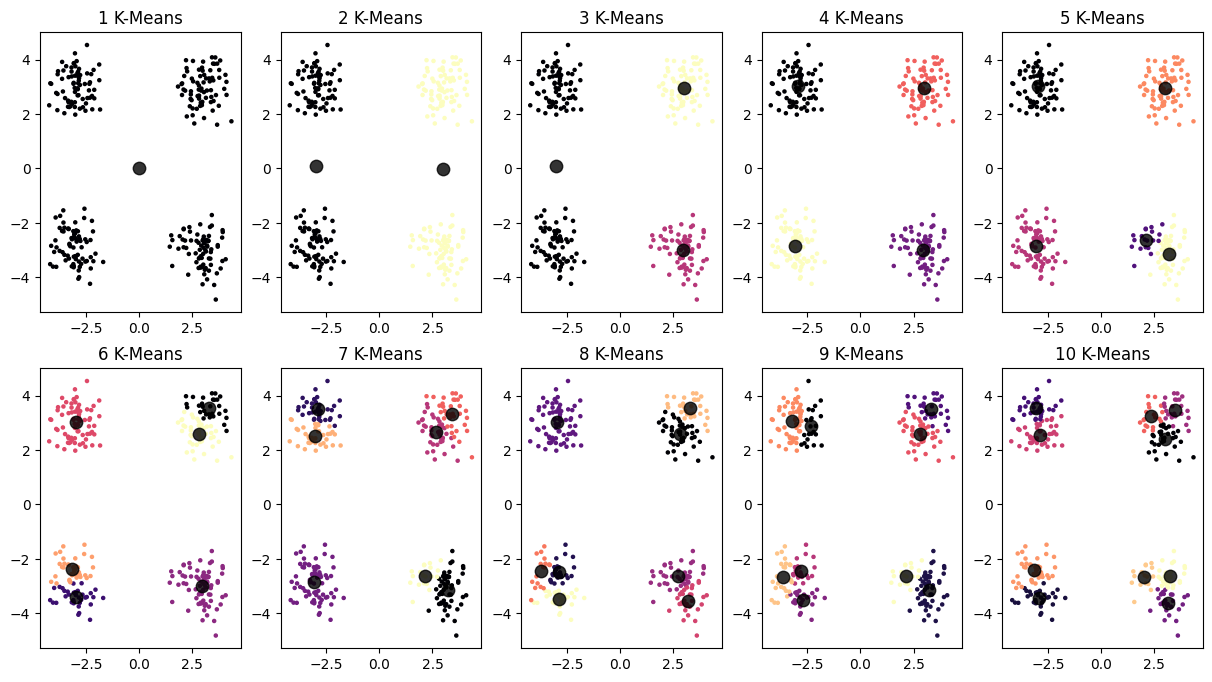

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[75  0]
 [ 0 75]
 [75  0]
 [ 0 75]]
---
Contingency Matrix for k = 3
[[75  0  0]
 [ 0 75  0]
 [75  0  0]
 [ 0  0 75]]
---
Contingency Matrix for k = 4
[[ 0  0  0 75]
 [ 0 75  0  0]
 [75  0  0  0]
 [ 0  0 75  0]]
---
Contingency Matrix for k = 5
[[ 0  0 75  0  0]
 [ 0 19  0  0 56]
 [75  0  0  0  0]
 [ 0  0  0 75  0]]
---
Contingency Matrix for k = 6
[[ 0 36  0  0 39  0]
 [ 0  0 75  0  0  0]
 [ 0  0  0 75  0  0]
 [29  0  0  0  0 46]]
---
Contingency Matrix for k = 7
[[ 0  0 75  0  0  0  0]
 [56  0  0  0  0  0 19]
 [ 0 38  0  0  0 37  0]
 [ 0  0  0 41 34  0  0]]
---
Contingency Matrix for k = 8
[[ 0 27  0  0  0 18  0 30]
 [ 0  0  0 43 32  0  0  0]
 [ 0  0 75  0  0  0  0  0]
 [46  0  0  0  0  0 29  0]]
---
Contingency Matrix for k = 9
[[ 0  0  0 25 24  0  0 26  0]
 [ 0 56  0  0  0  0  0  0 19]
 [22  0  0  0  0  0 53  0  0]
 [ 0  0 30  0  0 45  0  0  0]]
---
Contingency Matrix for k = 10
[[ 0 33  0  0  0

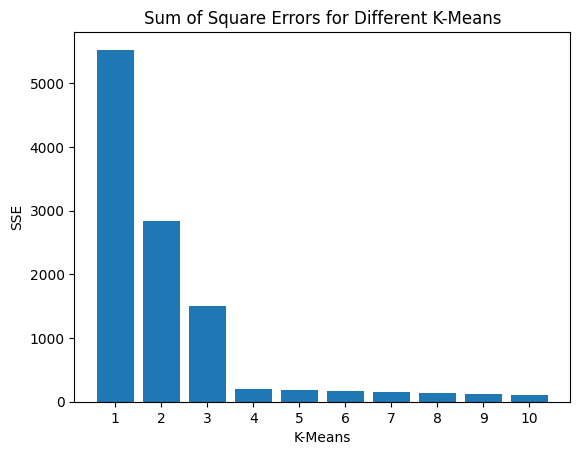

In [58]:
# (b), (c)
exec_KMeans(X, y, None)

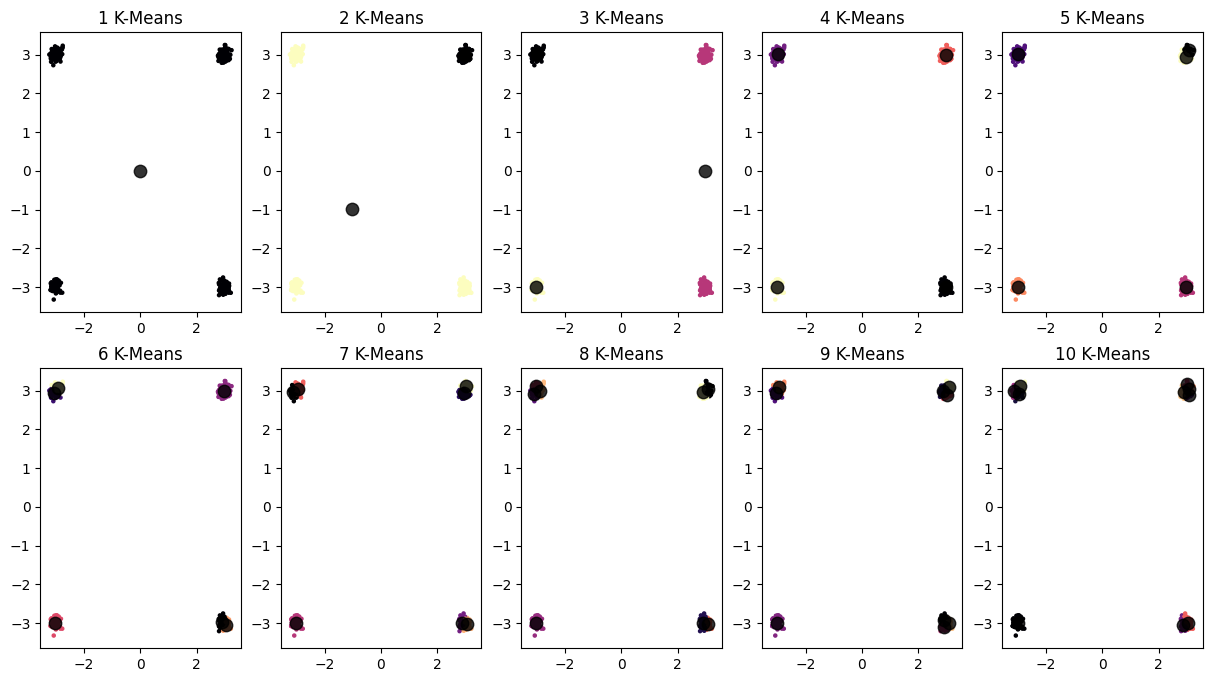

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[ 0 75]
 [ 0 75]
 [ 0 75]
 [75  0]]
---
Contingency Matrix for k = 3
[[ 0  0 75]
 [ 0 75  0]
 [75  0  0]
 [ 0 75  0]]
---
Contingency Matrix for k = 4
[[ 0  0  0 75]
 [75  0  0  0]
 [ 0 75  0  0]
 [ 0  0 75  0]]
---
Contingency Matrix for k = 5
[[ 0  0  0 75  0]
 [ 0  0 75  0  0]
 [ 0 75  0  0  0]
 [20  0  0  0 55]]
---
Contingency Matrix for k = 6
[[ 0  0  0 75  0  0]
 [40  0  0  0 35  0]
 [ 0 36  0  0  0 39]
 [ 0  0 75  0  0  0]]
---
Contingency Matrix for k = 7
[[ 0  0  0 75  0  0  0]
 [ 0  0 36  0  0 39  0]
 [29  0  0  0 46  0  0]
 [ 0 50  0  0  0  0 25]]
---
Contingency Matrix for k = 8
[[ 0  0  0 75  0  0  0  0]
 [ 0 48  0  0  0 27  0  0]
 [ 0  0 23  0 18  0 34  0]
 [35  0  0  0  0  0  0 40]]
---
Contingency Matrix for k = 9
[[ 0  0  0 75  0  0  0  0  0]
 [25  0  0  0 27  0  0 23  0]
 [ 0  0 36  0  0  0 39  0  0]
 [ 0 30  0  0  0 25  0  0 20]]
---
Contingency Matrix for k = 10
[[75  0  0  0  0

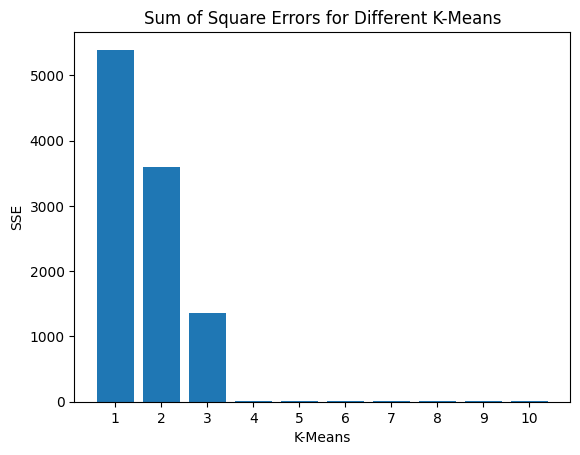

In [59]:
# (d) New Standard Deviation of 0.1
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.1, random_state=None)
exec_KMeans(X, y, None)

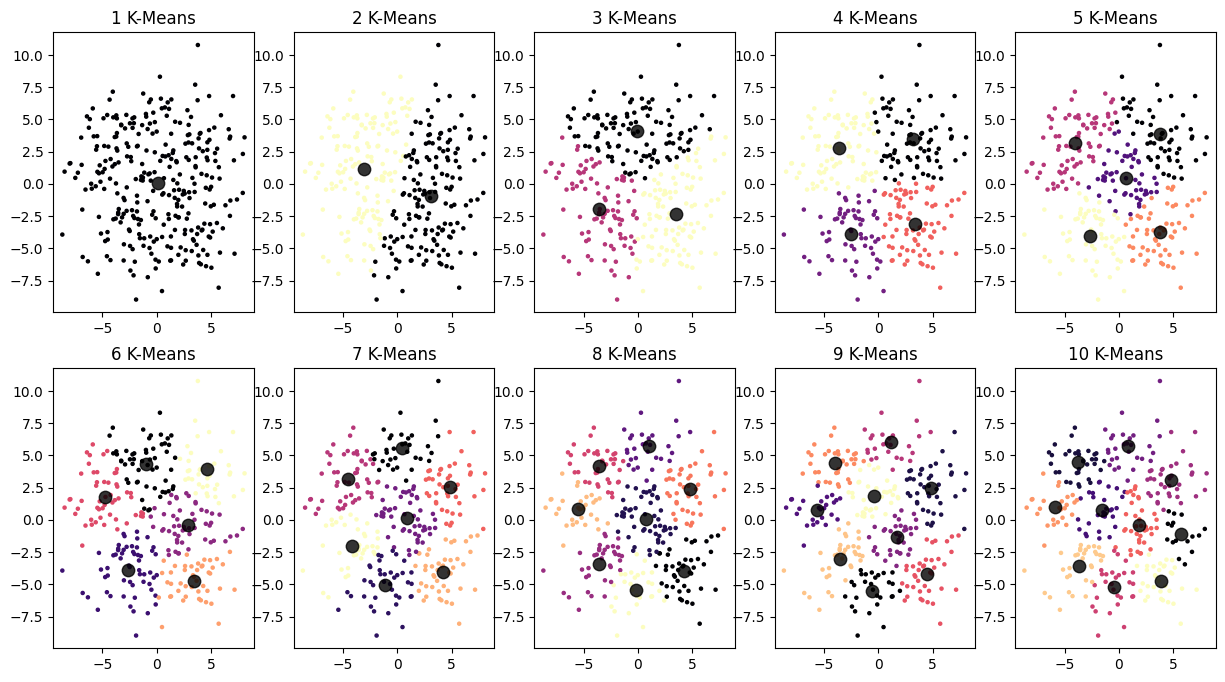

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[20 55]
 [72  3]
 [ 4 71]
 [59 16]]
---
Contingency Matrix for k = 3
[[ 4 60 11]
 [ 2  6 67]
 [50 25  0]
 [51  0 24]]
---
Contingency Matrix for k = 4
[[ 1 50  8 16]
 [ 5  8 61  1]
 [ 8  4  0 63]
 [60  0  8  7]]
---
Contingency Matrix for k = 5
[[ 0 15  9  3 48]
 [ 3 13  0 52  7]
 [ 6  8 57  0  4]
 [48 16  7  4  0]]
---
Contingency Matrix for k = 6
[[ 4 47  5 15  4  0]
 [ 0  6 26  0 40  3]
 [30  4  3 37  0  1]
 [20  0 19  1  1 34]]
---
Contingency Matrix for k = 7
[[ 0 28 14  4  0  1 28]
 [ 0 10 16  0  5 43  1]
 [12  0  8 46  2  0  7]
 [22  1 13  2 36  1  0]]
---
Contingency Matrix for k = 8
[[ 0 16  0 31  0  0 12 16]
 [42 15  0  1  0  6  0 11]
 [ 0  8  8  4 35  2 18  0]
 [ 1 12 22  0  3 36  0  1]]
---
Contingency Matrix for k = 9
[[19  0 10  8  0  0  0 31  7]
 [ 9  5  0 21  0 38  0  1  1]
 [ 0  2 16  0  7  0 32  4 14]
 [ 0 35  0  6 19  1  2  0 12]]
---
Contingency Matrix for k = 10
[[ 0  0 13  0  0

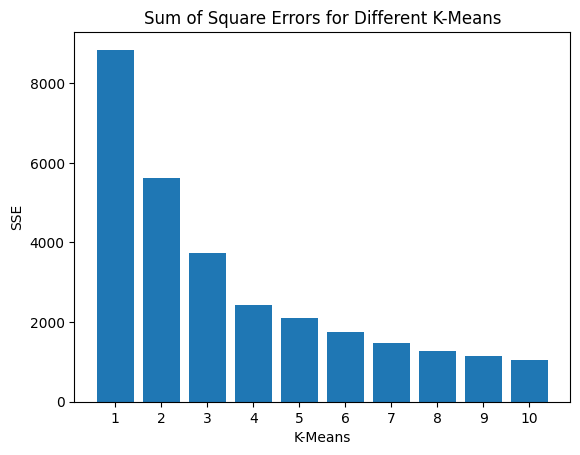

In [60]:
# (d) New Standard Deviation of 2.5
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=2.5, random_state=None)
exec_KMeans(X, y, None)

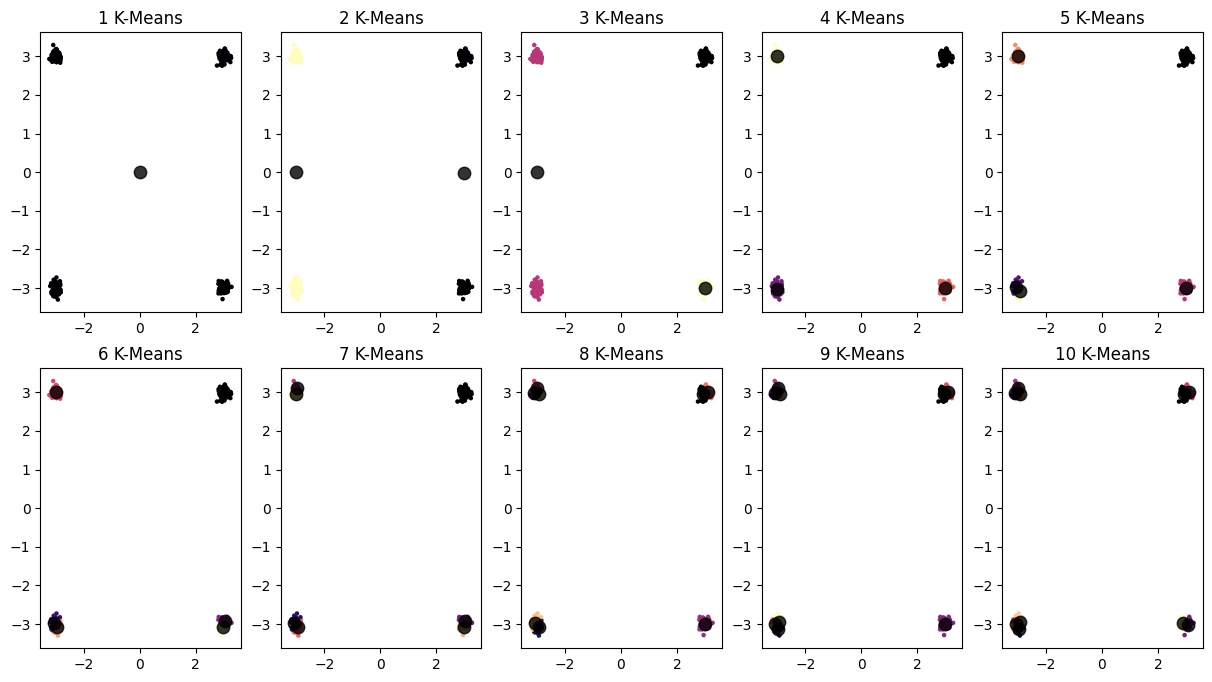

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[ 0 75]
 [75  0]
 [ 0 75]
 [75  0]]
---
Contingency Matrix for k = 3
[[ 0 75  0]
 [ 0  0 75]
 [ 0 75  0]
 [75  0  0]]
---
Contingency Matrix for k = 4
[[ 0 75  0  0]
 [ 0  0 75  0]
 [ 0  0  0 75]
 [75  0  0  0]]
---
Contingency Matrix for k = 5
[[ 0 37  0  0 38]
 [ 0  0 75  0  0]
 [ 0  0  0 75  0]
 [75  0  0  0  0]]
---
Contingency Matrix for k = 6
[[ 0 37  0  0 38  0]
 [ 0  0 35  0  0 40]
 [ 0  0  0 75  0  0]
 [75  0  0  0  0  0]]
---
Contingency Matrix for k = 7
[[ 0 37  0  0 38  0  0]
 [ 0  0 35  0  0 40  0]
 [ 0  0  0 27  0  0 48]
 [75  0  0  0  0  0  0]]
---
Contingency Matrix for k = 8
[[ 0 36  0  0  0  0 39  0]
 [ 0  0  0 75  0  0  0  0]
 [ 0  0 31  0 23  0  0 21]
 [44  0  0  0  0 31  0  0]]
---
Contingency Matrix for k = 9
[[ 0 23  0  0  0  0 32  0 20]
 [ 0  0  0 75  0  0  0  0  0]
 [ 0  0 31  0 23  0  0 21  0]
 [44  0  0  0  0 31  0  0  0]]
---
Contingency Matrix for k = 10
[[ 0 23  0  0  0

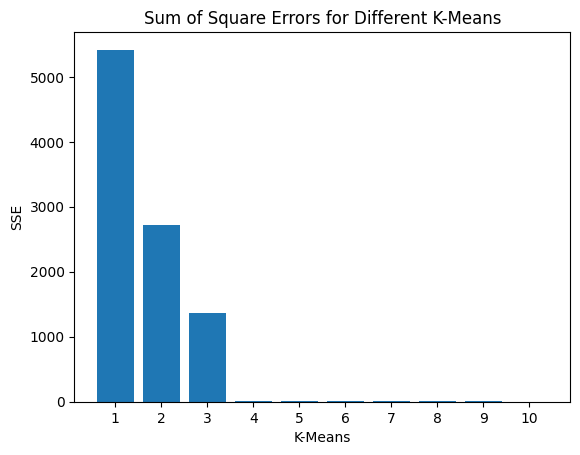

In [61]:
# (e) - Standard Deviation of 0.1
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.1, random_state=None)
exec_KMeans(X, y, 42)

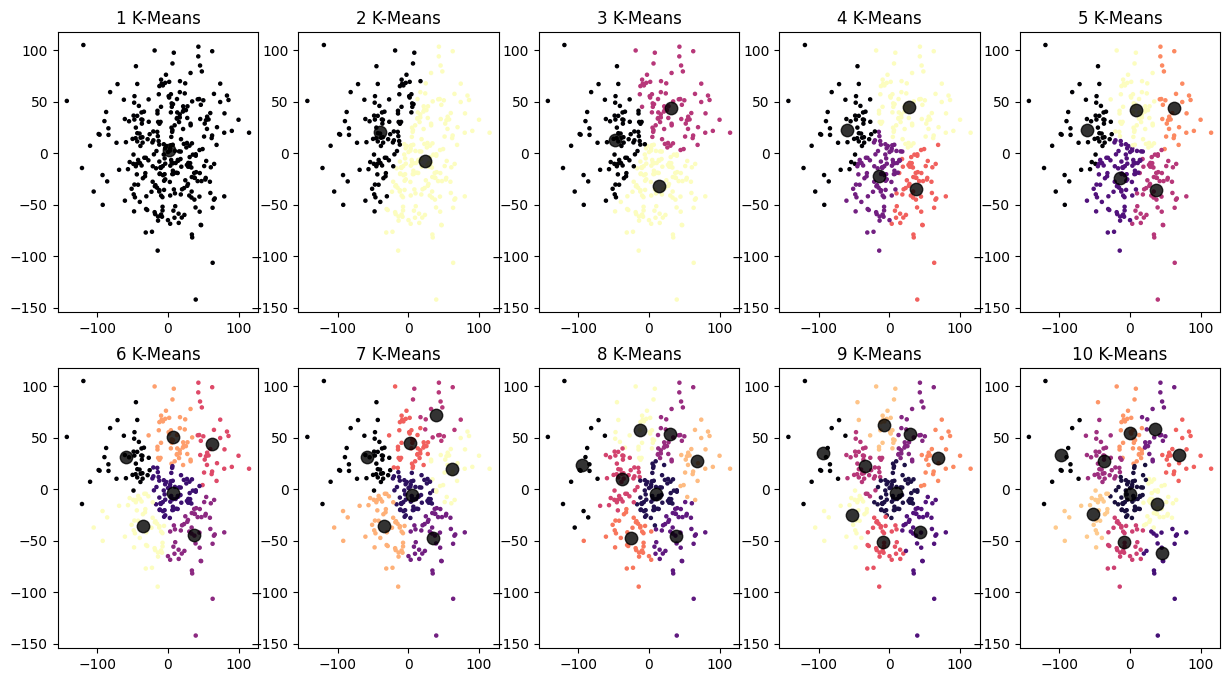

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[33 42]
 [22 53]
 [34 41]
 [20 55]]
---
Contingency Matrix for k = 3
[[26 19 30]
 [15 27 33]
 [27 17 31]
 [19 22 34]]
---
Contingency Matrix for k = 4
[[17 20 18 20]
 [12 23 13 27]
 [14 27 16 18]
 [11 25 17 22]]
---
Contingency Matrix for k = 5
[[16 20 17  6 16]
 [12 21 13 13 16]
 [14 27 16  5 13]
 [10 23 16  8 18]]
---
Contingency Matrix for k = 6
[[14 10 15  6 15 15]
 [10 16 10 13 12 14]
 [12 16 13  5 11 18]
 [ 8 29 13  8 11  6]]
---
Contingency Matrix for k = 7
[[14  9 14  3 13 15  7]
 [10 15  9  7 10 14 10]
 [12 15 12  6  8 18  4]
 [ 8 24 12  2 13  6 10]]
---
Contingency Matrix for k = 8
[[ 6 11 13  6 11 11  6 11]
 [ 1 17  9 10 10 12  9  7]
 [ 7 14 11  6 14 11  4  8]
 [ 3 24 12  8 11  5  7  5]]
---
Contingency Matrix for k = 9
[[ 5 10 13  6 11  8  5  9  8]
 [ 1 17  9 10  9 11  8  6  4]
 [ 6 16  7  6  8 11  4  6 11]
 [ 2 23 11  8 12  6  7  3  3]]
---
Contingency Matrix for k = 10
[[ 5  7  6  2 11

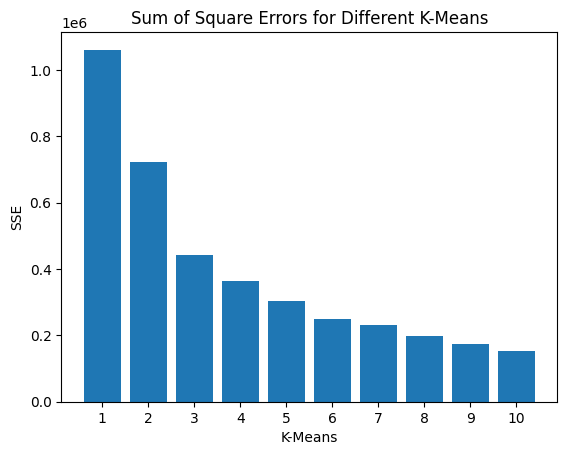

In [62]:
# (e) - Standard Deviation of 2.5
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=42, random_state=None)
exec_KMeans(X, y, 42)

## Assignment 2

In [63]:
# Load data
X = pd.read_csv('vertebrate.csv')
print(X.head(20))

# Remove non-numeric columns
y = X['Class'].tolist()
names = X['Name'].tolist()
X = X.drop(columns=['Name', 'Class'])

             Name  Warm-blooded  Gives Birth  Aquatic Creature  \
0           human             1            1                 0   
1          python             0            0                 0   
2          salmon             0            0                 1   
3           whale             1            1                 1   
4            frog             0            0                 1   
5          komodo             0            0                 0   
6             bat             1            1                 0   
7          pigeon             1            0                 0   
8             cat             1            1                 0   
9   leopard shark             0            1                 1   
10         turtle             0            0                 1   
11        penguin             1            0                 1   
12      porcupine             1            1                 0   
13            eel             0            0                 1   
14     sal

In [64]:
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
def hierarchical_clustering(link_type: str):
    labels = []
    for i in range(len(names)):
        labels.append(f'{y[i]} | {names[i]}')
    Z = linkage(X, link_type)
    plt.figure(figsize=(10, 5))
    dn = dendrogram(
            Z,
            orientation='left',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=False
          )

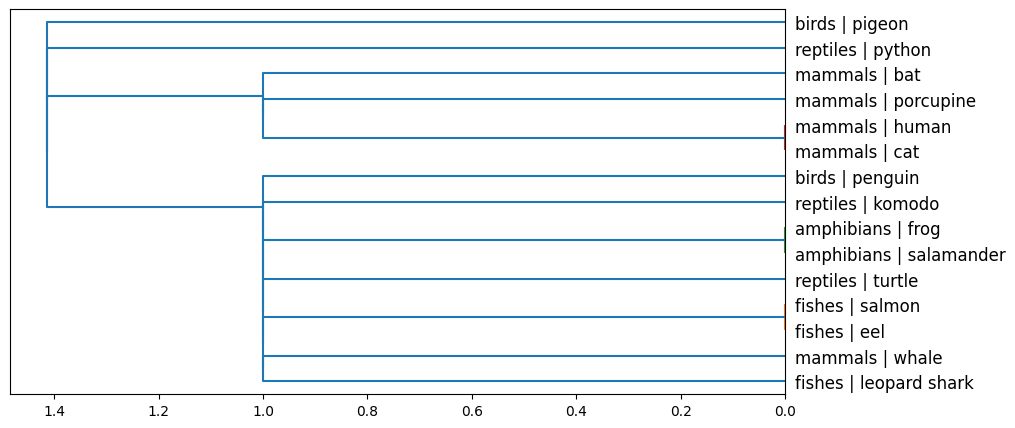

In [65]:
hierarchical_clustering('single')

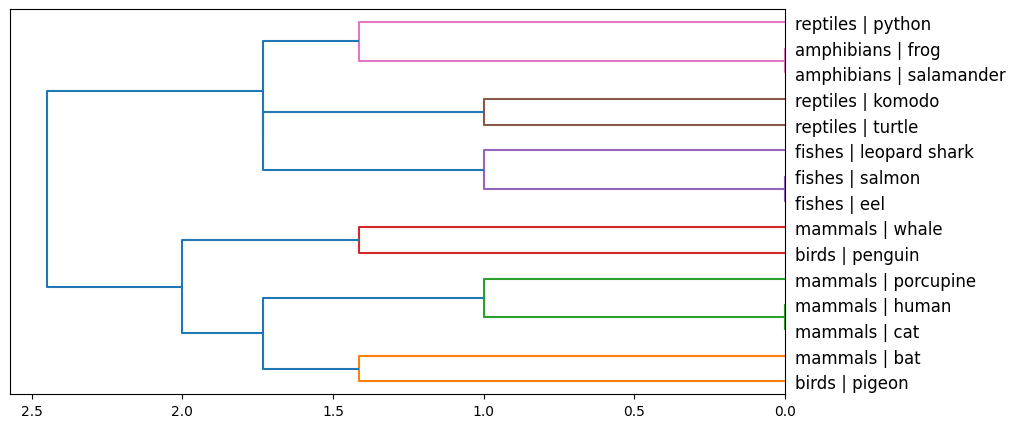

In [66]:
hierarchical_clustering('complete')

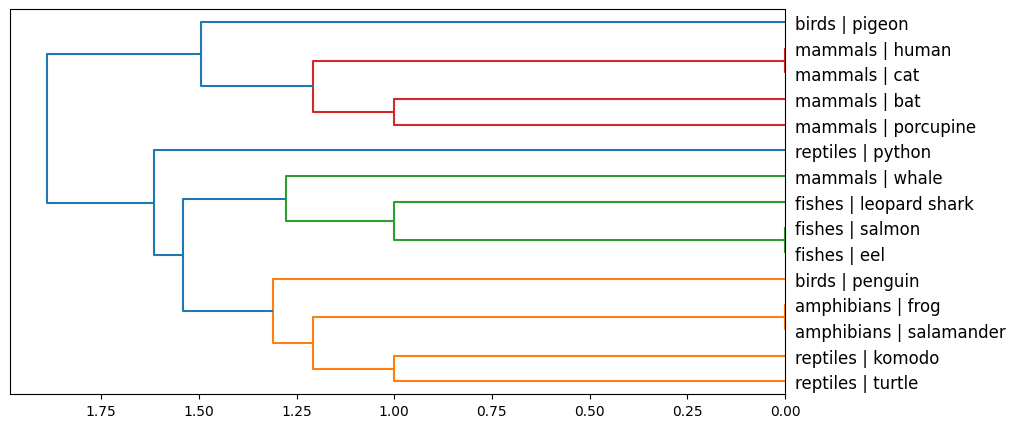

In [67]:
hierarchical_clustering('average')

## Assignment 3

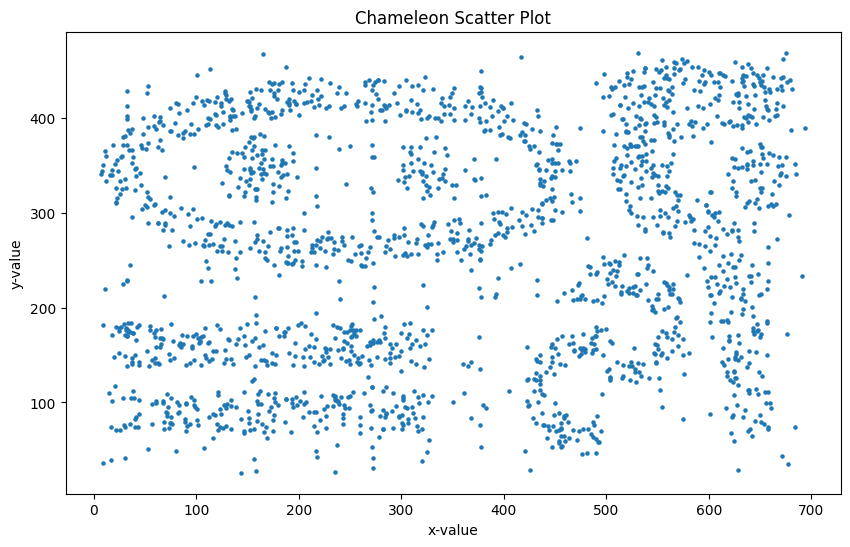

In [68]:
# (a)
# Load data
X = pd.read_csv('chameleon.csv')
#print(X.iloc[:, 0])
plt.figure(figsize=(10, 6))
plt.title('Chameleon Scatter Plot')
plt.xlabel('x-value')
plt.ylabel('y-value')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=5)

In [69]:
# (b)

def exec_DBSCAN(eps_value):
    db = DBSCAN(eps=eps_value, min_samples=5)
    db.fit(X)
    pred = db.fit_predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.title(f'EPS = {eps_value} | Min Samples = 5')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred, s=5, cmap='viridis')

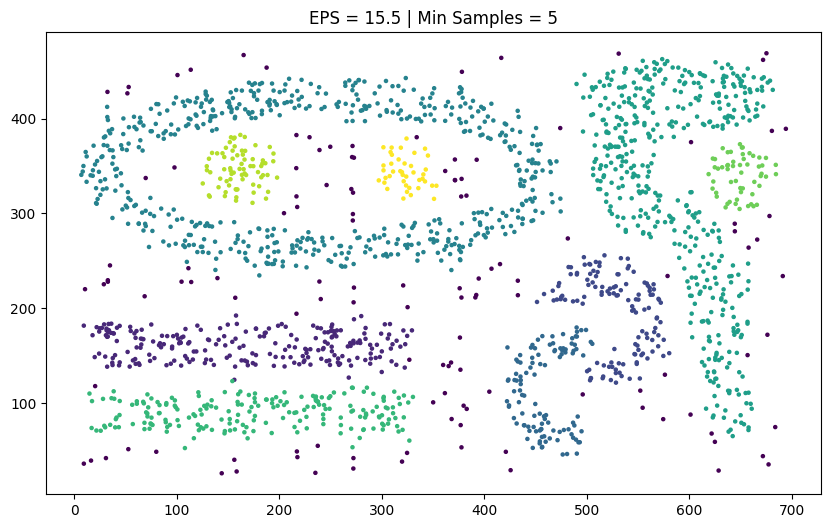

In [70]:
exec_DBSCAN(15.5)

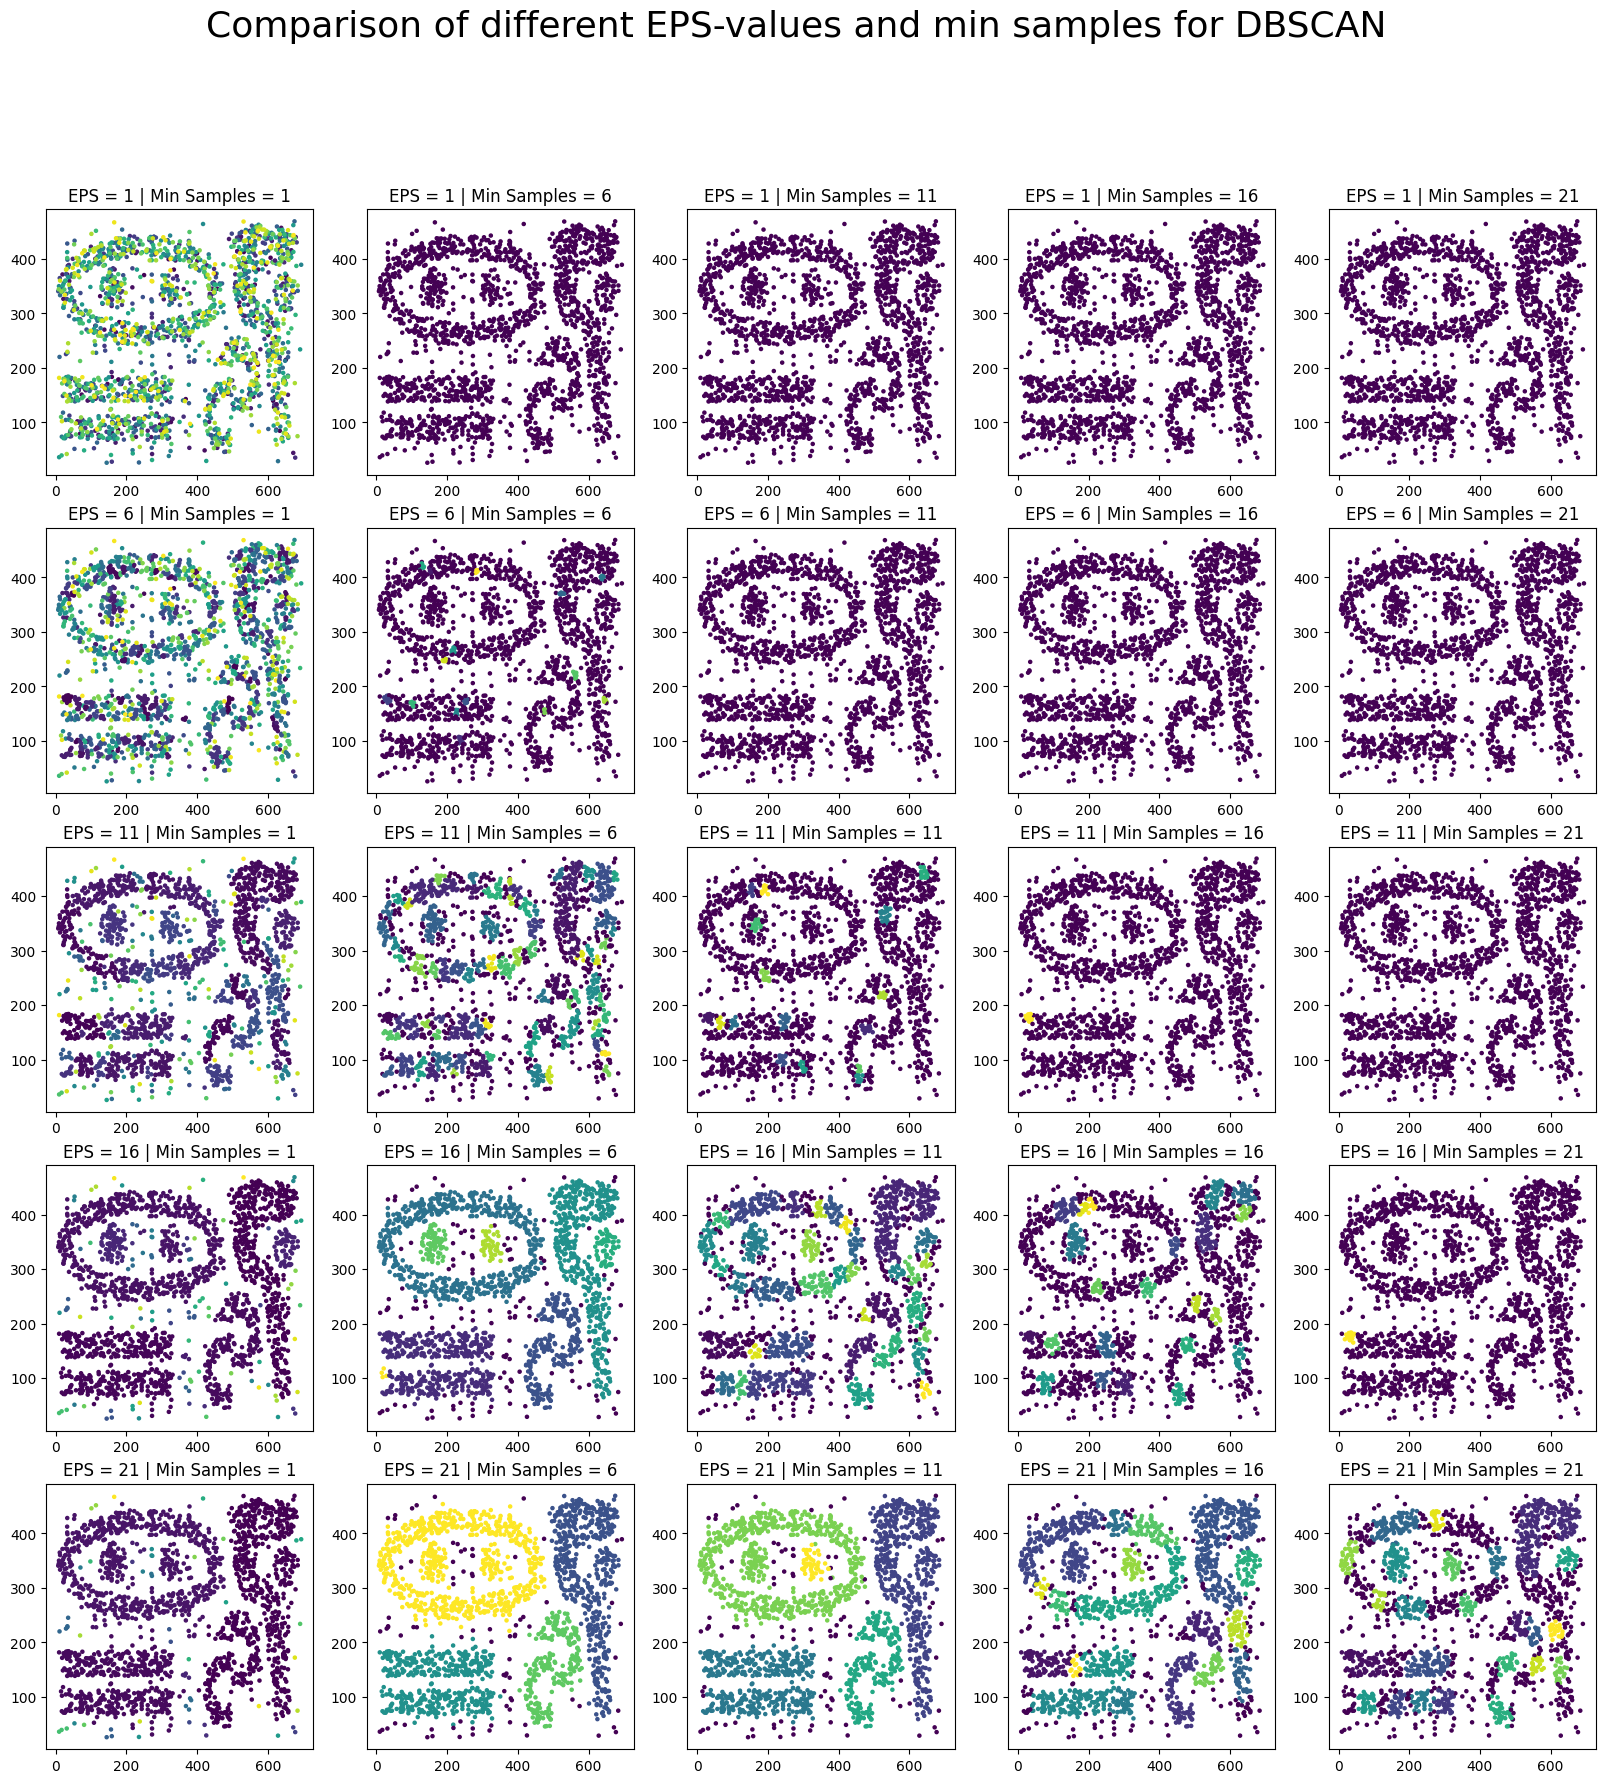

In [71]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
fig.suptitle('Comparison of different EPS-values and min samples for DBSCAN', fontsize=26)

for i in range(5):
    for j in range(5):
        eps_value = (i * 5) + 1
        min_samples_value = (j * 5) + 1
        db = DBSCAN(eps=eps_value, min_samples=min_samples_value)
        db.fit(X)
        pred = db.fit_predict(X)
        plt.title(f'Scatter Plot (EPS = {eps_value})')
        axs[i, j].scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred, s=5, cmap='viridis')
        axs[i, j].set_title(f'EPS = {eps_value} | Min Samples = {min_samples_value}')
